<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

# Loading Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/MpRonald/datasets/main/credit_data.csv')
data.shape

(2000, 5)

In [3]:
data.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
data.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [5]:
data.dropna(inplace=True)
data.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.isna().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


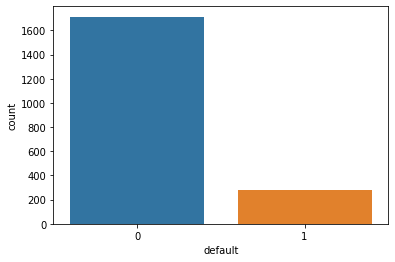

In [11]:
sns.countplot(data.default);

In [12]:
X = data.iloc[:,1:4].values
y = data.iloc[:,4].values

In [13]:
X.shape, y.shape

((1997, 3), (1997,))

# Train and Test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [20]:
X_train.shape, y_train.shape

((1597, 3), (1597,))

In [21]:
X_test.shape, y_test.shape

((400, 3), (400,))

# Naive Bayes

In [23]:
naive = GaussianNB().fit(X_train, y_train)

In [24]:
y_pred = naive.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)

0.9325

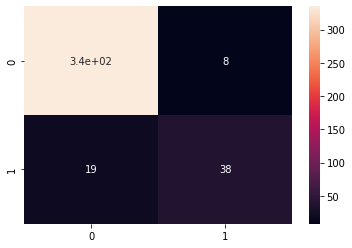

In [31]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

# Undersampling and Oversampling

In [37]:
# undersampling
tomek = TomekLinks()
X_under, y_under = tomek.fit_resample(X,y)

In [38]:
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [39]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

In [40]:
X_train_under, X_test_under, y_train_under, y_test_under =\
train_test_split(X_under, y_under, test_size=0.2, stratify=y_under)

In [41]:
naive_under = GaussianNB().fit(X_train_under, y_train_under)
y_pred_under = naive_under.predict(X_test_under)
accuracy_score(y_test_under, y_pred_under)

0.9157894736842105

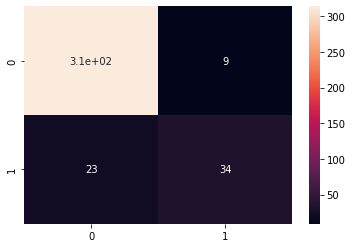

In [42]:
cm_under = confusion_matrix(y_test_under, y_pred_under)
sns.heatmap(cm_under, annot=True);

In [47]:
#oversampling
smote = SMOTE()
X_over, y_over = smote.fit_resample(X, y)

In [48]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [49]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [52]:
X_train_over, X_test_over, y_train_over, y_test_over =\
train_test_split(X_over, y_over, test_size=0.2, stratify=y_over)

In [53]:
naive_over = GaussianNB().fit(X_train_over, y_train_over)
y_pred_over = naive_under.predict(X_test_over)
accuracy_score(y_test_over, y_pred_over)

0.8090379008746356

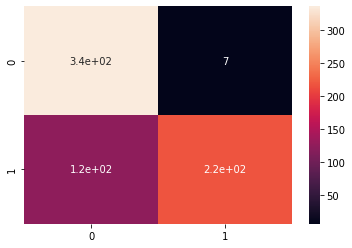

In [54]:
cm_over = confusion_matrix(y_test_over, y_pred_over)
sns.heatmap(cm_over, annot=True);

In [55]:
cm_over

array([[336,   7],
       [124, 219]])